## 3. Concrete Strength Dataset
**Source**: https://www.kaggle.com/datasets/elikplim/concrete-compressive-strength-data-set
**Objective**: Assess the impact of ingredients on concrete strength.
\
From: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)

### Concrete Compressive Strength

**Data Type:** Multivariate  

#### Abstract  
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.  

### Sources  
**Original Owner and Donor**  
Prof. I-Cheng Yeh  
Department of Information Management  
Chung-Hua University,  
Hsin Chu, Taiwan 30067, R.O.C.  
**Email:** icyeh@chu.edu.tw  
**TEL:** +886-3-5186511  

**Date Donated:** August 3, 2007  

### Data Characteristics  
- **Number of instances (observations):** 1030  
- **Number of Attributes:** 9  
- **Attribute breakdown:** 8 quantitative input variables, and 1 quantitative output variable  
- **Missing Attribute Values:** None  

### Summary Statistics  
The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from the laboratory. Data is in raw form (not scaled).  

### Variable Information  

| Name | Data Type | Measurement | Description |
|------|----------|------------|-------------|
| Cement (component 1) | Quantitative | kg in a m³ mixture | Input Variable |
| Blast Furnace Slag (component 2) | Quantitative | kg in a m³ mixture | Input Variable |
| Fly Ash (component 3) | Quantitative | kg in a m³ mixture | Input Variable |
| Water (component 4) | Quantitative | kg in a m³ mixture | Input Variable |
| Superplasticizer (component 5) | Quantitative | kg in a m³ mixture | Input Variable |
| Coarse Aggregate (component 6) | Quantitative | kg in a m³ mixture | Input Variable |
| Fine Aggregate (component 7) | Quantitative | kg in a m³ mixture | Input Variable |
| Age | Quantitative | Day (1~365) | Input Variable |
| Concrete Compressive Strength | Quantitative | MPa | Output Variable |


In [32]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
import warnings
warnings.filterwarnings('ignore')

In [33]:
#Reading the data
data = pd.read_csv("/content/concrete_data.csv")

In [34]:
#Printing the data
data

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [35]:
#finding the datatypes,colums and rows /information of the data provided
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


From the info we can see
1. The data has 1030 rows and 9 columns
2. There are no null values and all colomns are numerical no categorial data present




In [36]:
#Print the duplicated rows
data[data.duplicated()]

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [37]:
#printing the number of duplicate rows
data.duplicated().sum()

25

1. We can observe a lot of duplicate values here around 25 ,so droping the colomns to increase the consistency of the data

In [38]:
#Droping duplicate colomns
data.drop_duplicates(inplace=True)

In [39]:
data.duplicated().sum()

0

In [40]:
#Printing the colomns and rows in dataset
data.shape

(1005, 9)

In [41]:
#finding the mean,Standard deviation ,count, median for columns
data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


1. From describing data we can see most of the coloumns have a vast diff between 75%(upper quartile region) and max (outer extreme) so there might be outliers present
2. So plotting histogram and boxplot for numerical colomns


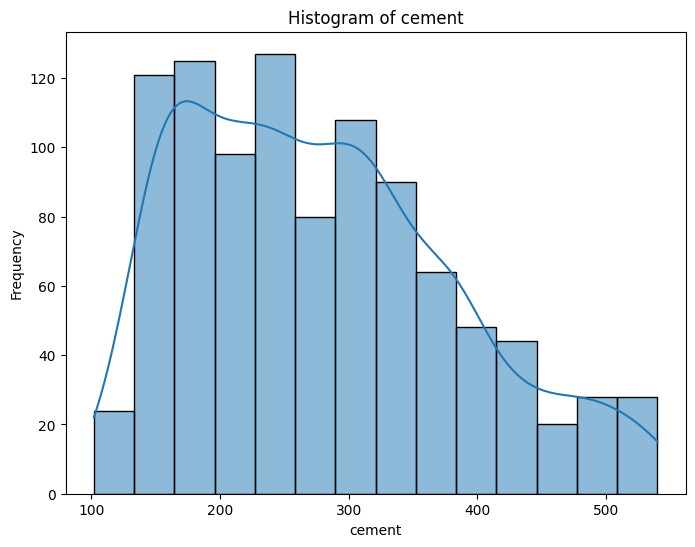

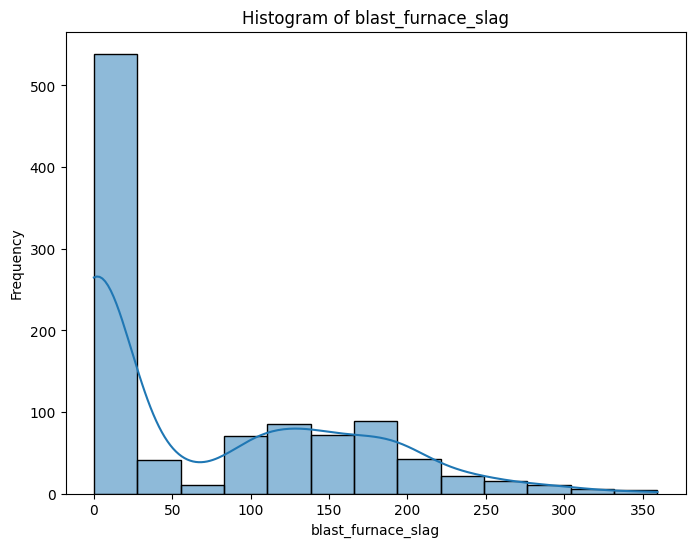

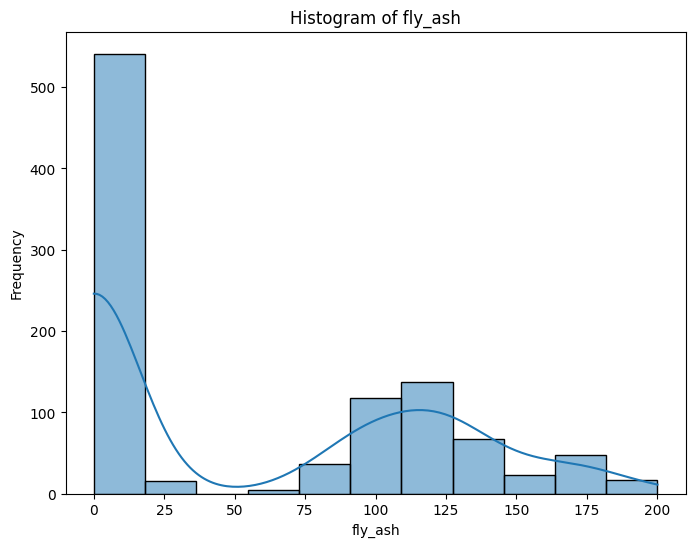

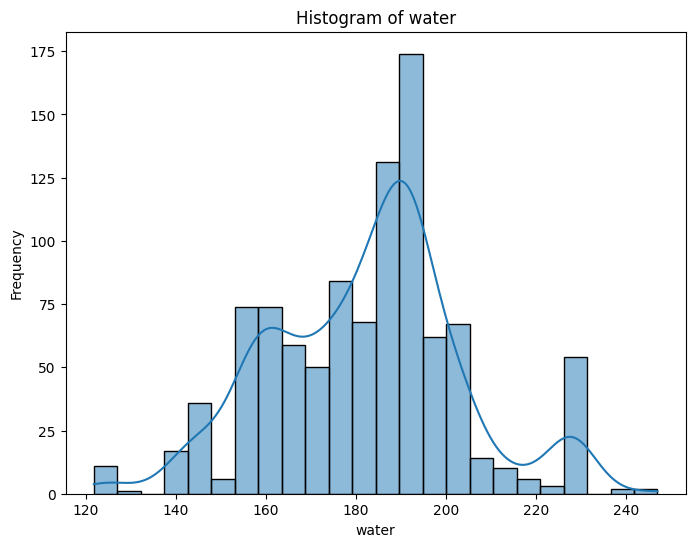

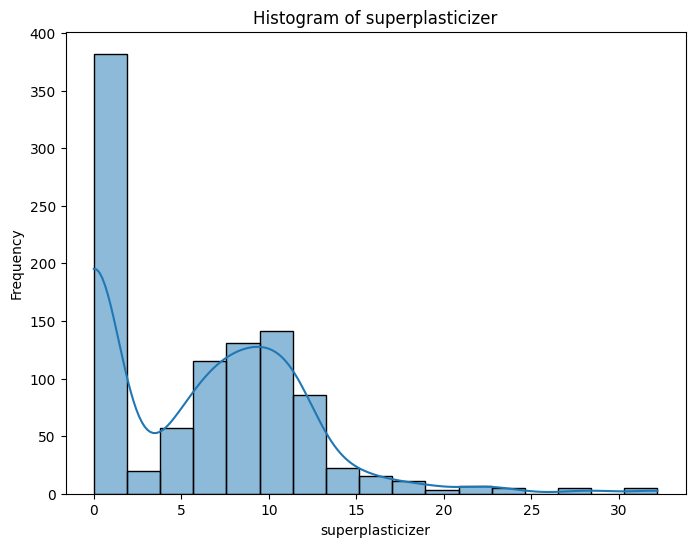

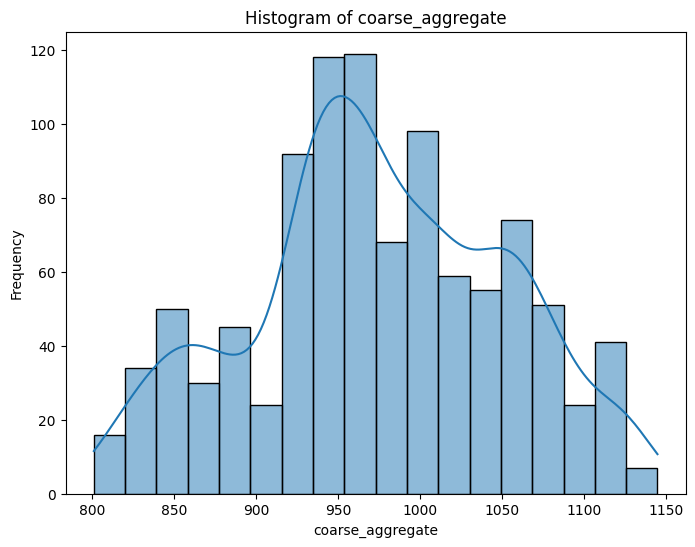

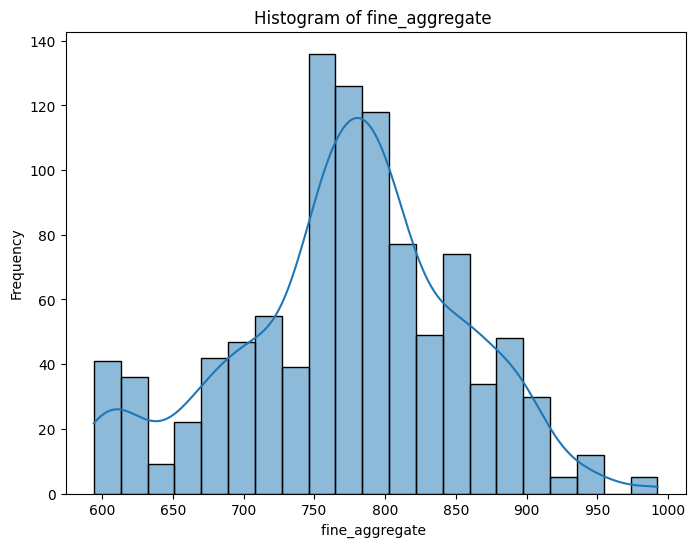

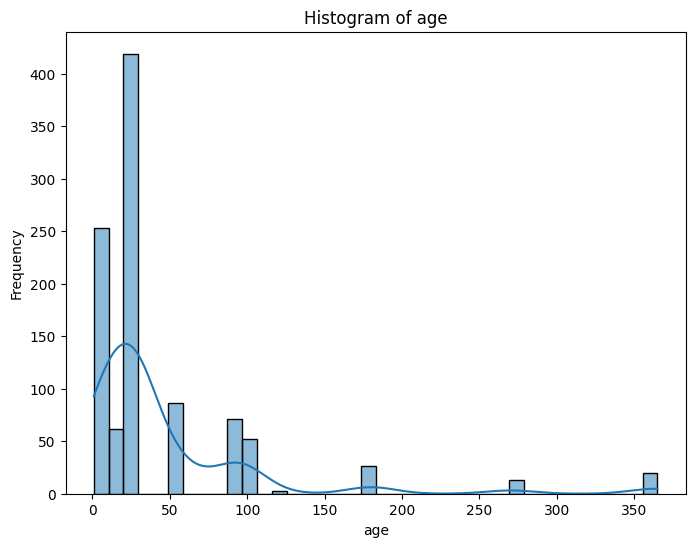

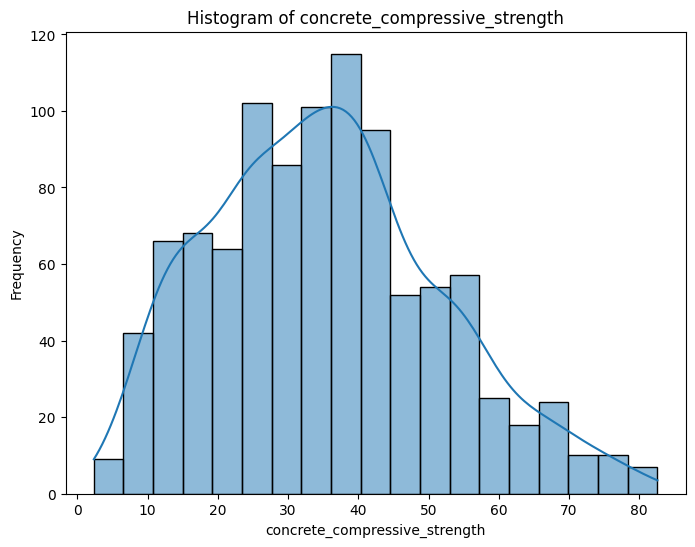

In [42]:
#Histogram for numerical colomns
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)  # Added KDE for better visualization
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

  From the histogram
  1. Cement quatity in the mixture ~ 250 is observed more around more than 120 times and the most observed cement quantities are ~150 to 200 and 300 ,ranges from ~100 to 500
  2. blast_furnace_slag has highest frequency at 0 which indicates that most of the mixture the compinent is not used, ranges from ~0 to 350 and the second best observed quantity is around ~100 to ~200 ,we can see some skewness to the right of indicating possible outliers
  3. Fly ash also has highest frequency at 0 which indicates that most of the mixture the compinent is not used, ranges from ~0 to 200 and the second best observed quantity is around ~100 to ~125
  4. water quantity of ~190 is observed more than 175 times, ranges from ~120 to 240 and most observations have moderate water qunatity around ~160 to ~200 and we could see some skewness in the graph on both sides
  5. Superplastic has highest frequency at 0 which indicates that most of the mixture the component is not used , ranges from ~0 to 30 and the second best observed quantity is around ~5 to ~14 so less ammounts of superplastic is used most and we could see some skewness to the right
  6. coarse aggregate has highest frequency at ~950 to ~975 ,ranges from ~800 to 1150, in most cases high ammounts of coarse aggregate is used
  7. fine aggregate has highest frequency at ~750 ,ranges from ~600 to 1000,  second best observed quantity is around ~760 to ~800 and in most cases high ammounts of coarse aggregate is used
  8. Age has highest frequency around ~30 more than ~400 most observations are concentrated around ~0 to 50 and histogram is skewed to the right
  9.  concrete_compressive_strength has highest frequency at ~40 more than 120 observations,ranges from ~0 to 80,  second best observed strength is around ~30 to ~45 and in most cases high ammounts of strength is observed

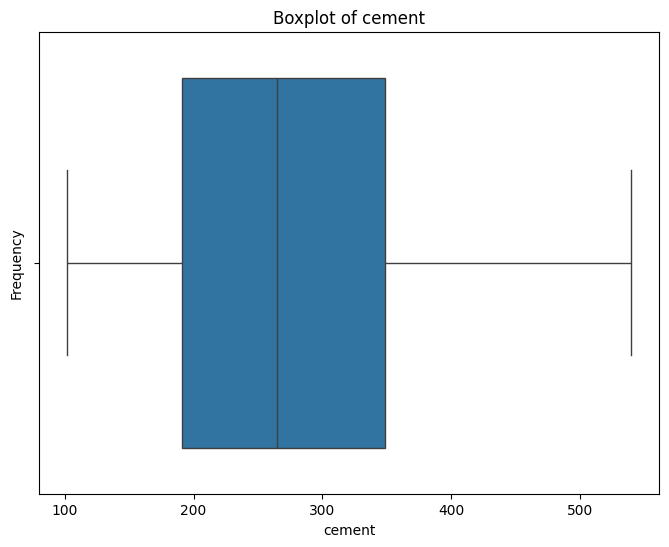

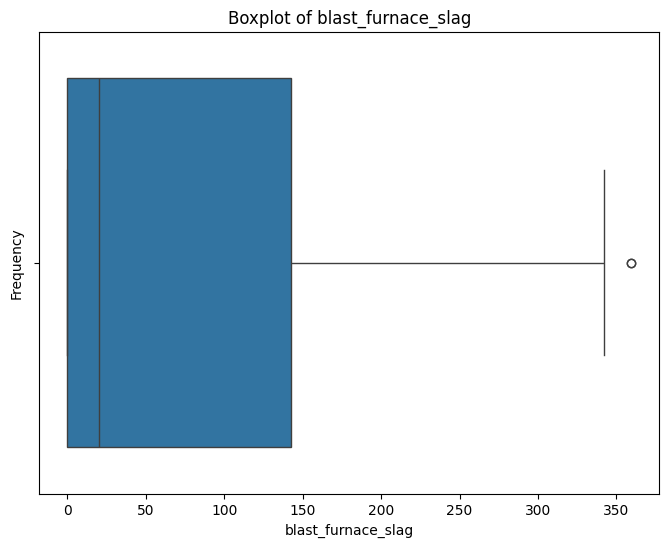

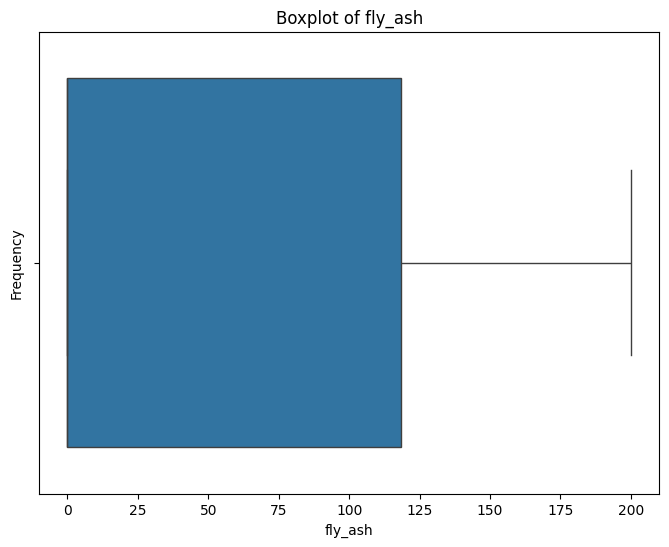

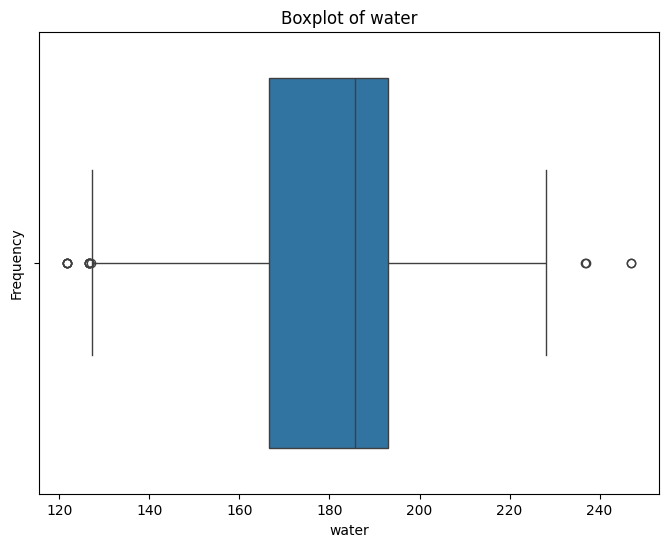

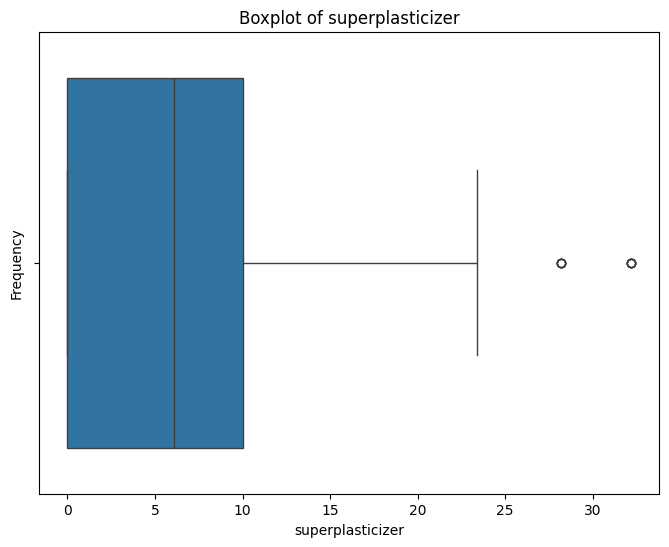

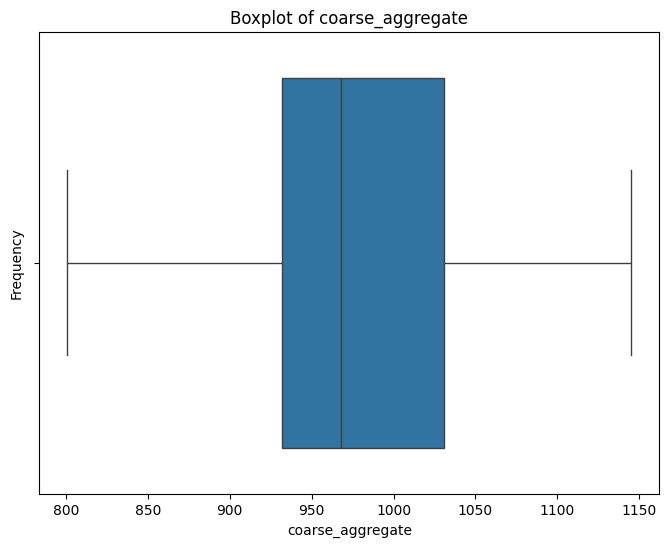

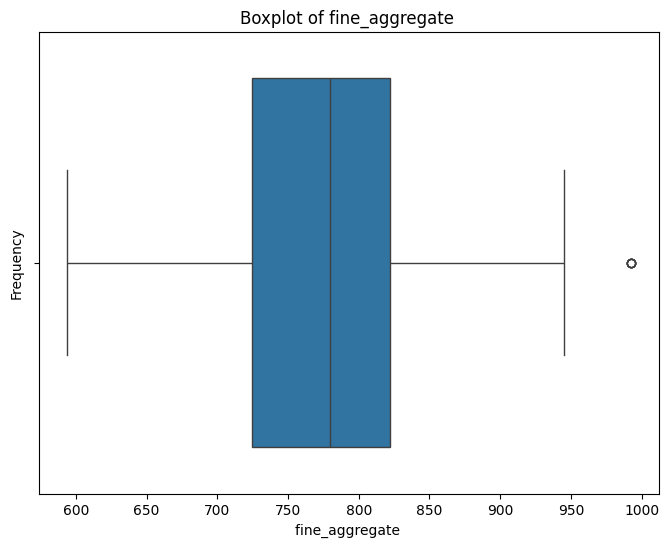

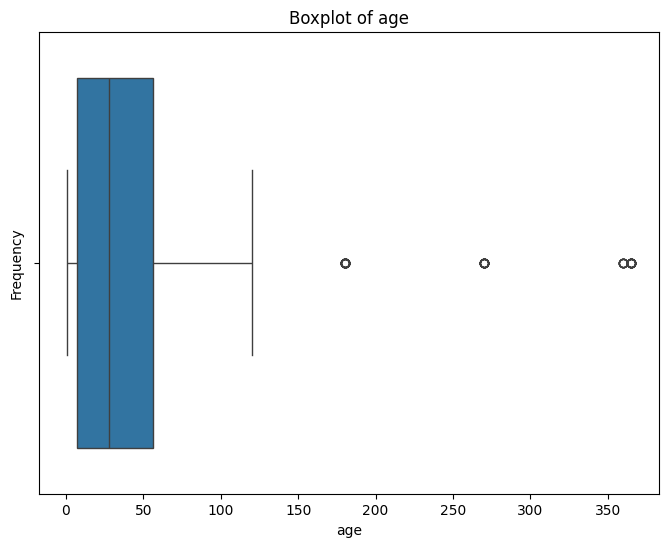

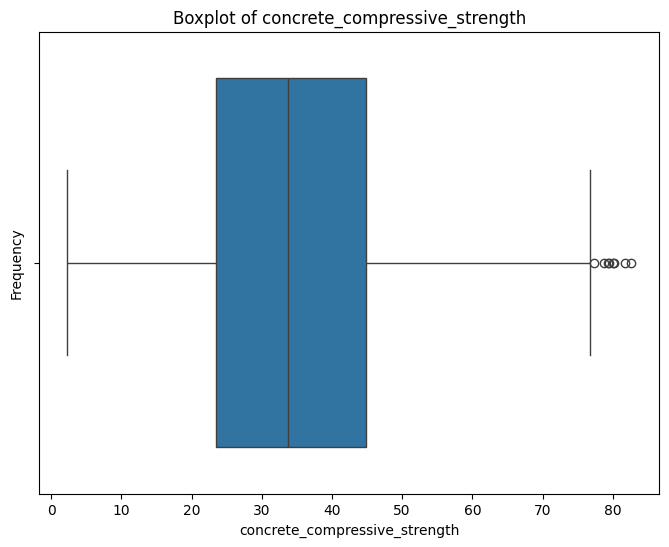

In [43]:
#boxplot for numerical colomns
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=data)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

From the boxplot We can see few outliers present in
1.	blast_furnace_slag has only one outlier around above 350
2.	water has few outliers around ~120 and above ~230
3. 	superplasticizer has few outliers on the right above ~25
4.	fine_aggregate has only one outlier on the right above ~950
5.	age has few outliers around above ~150 to the right
6.  concrete_compressive_strength has few outliers on right above ~70 strength

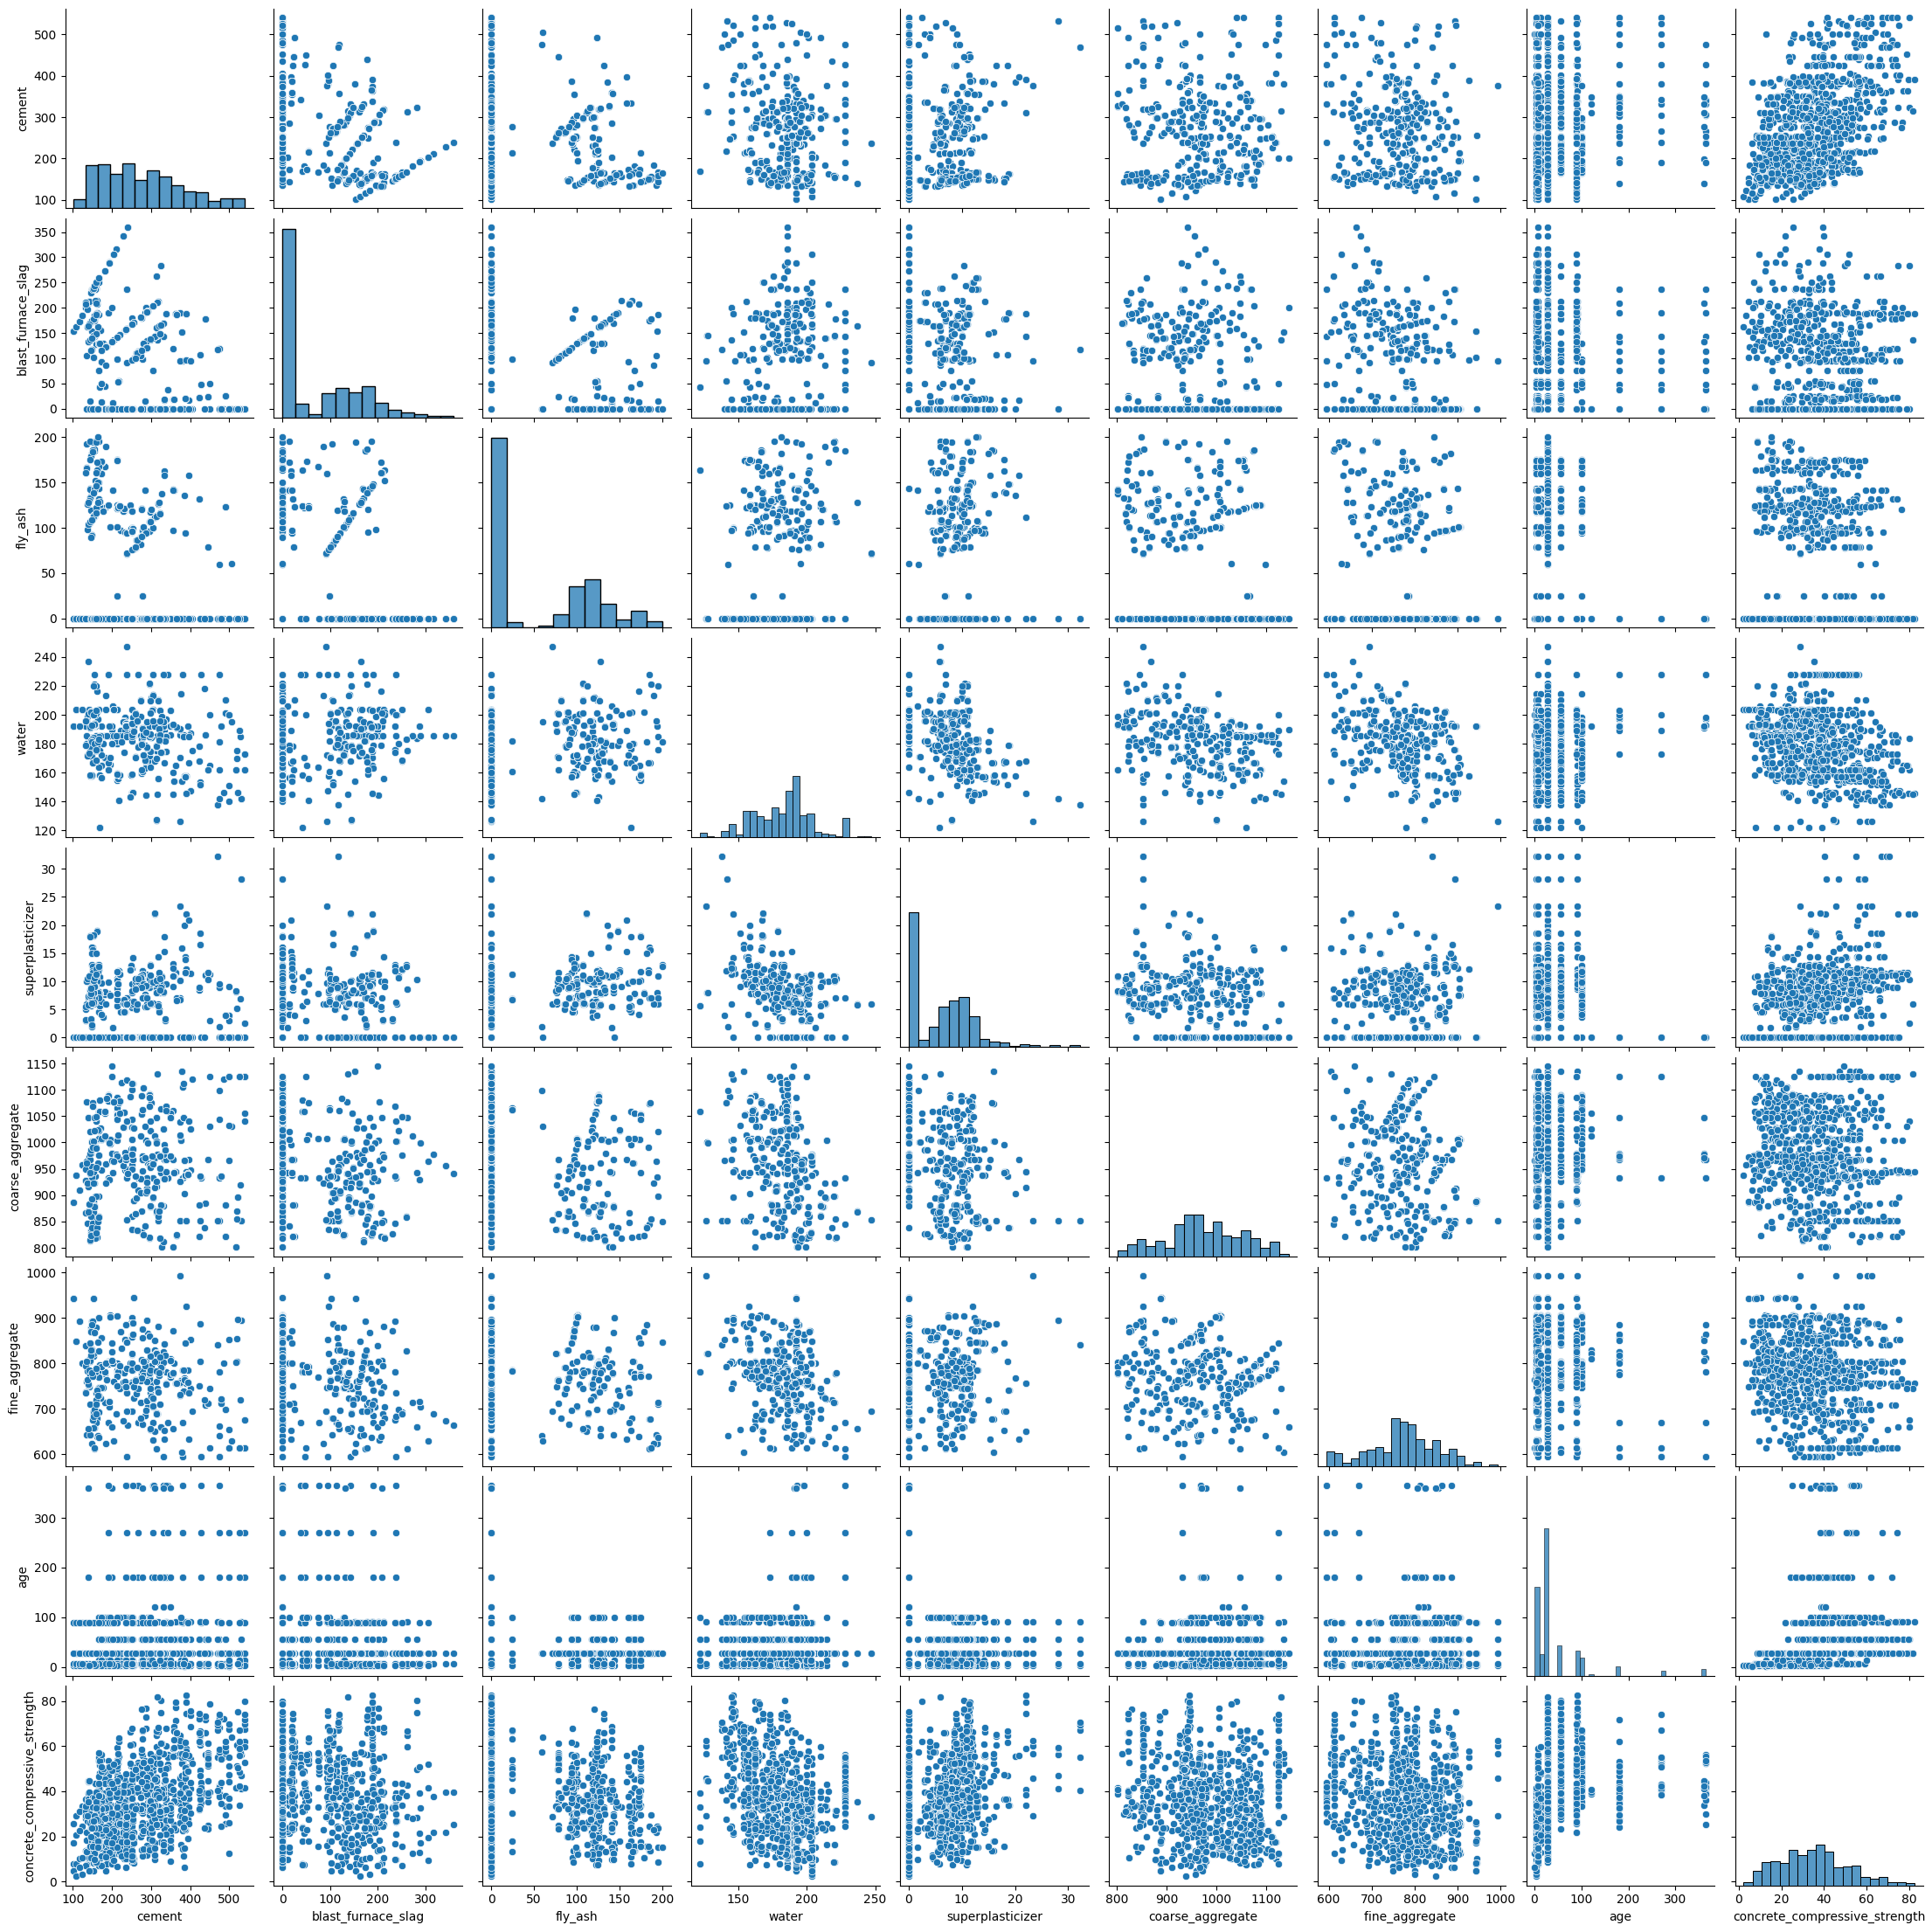

In [44]:
#Pairplot to understand relation between features
sns.pairplot(data)

From the pairplot we can observe
1. Cement has an linear upward trend which suggests with increase in cement quantity the concrete compressive strenght also increase
2. when moderate or low ammounts of blast furnance slag is used the concrete compressive strenght is high
3. Fly ash when used in high quantities gives moderate concrete compressive strenght and when not used gives high concrete compressive strenght but only in few cases
4. Water dose not follow a particular trend but moderate ammounts of water gives high concrete compressive strenght
5. Superplasticizer when used in less quantities gives moderate to high concrete compressive strenght
6. Coarse aggregate is scattered evenly acroos and dosen't follow a trend but few data concentration around moderate concrete compressive strenght from low to high quantities of coarse aggregate
7. fine aggregate has high concrete compressive strenght when used in moderate quantities
8. when the age is less around ~ 0 to 100 we could see more or high concrete compressive strenght

In [45]:
#Printing the last five rows in the dataset
data.tail()


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [46]:
# Identify outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Columns with potential outliers
columns_with_outliers = ['blast_furnace_slag', 'water', 'superplasticizer','age', 'concrete_compressive_strength']

# Remove outliers
data = remove_outliers_iqr(data.copy(), columns_with_outliers)

In [47]:
#Fixing the outliers with median values
data['age'] = data['age'].fillna(data['age'].median())

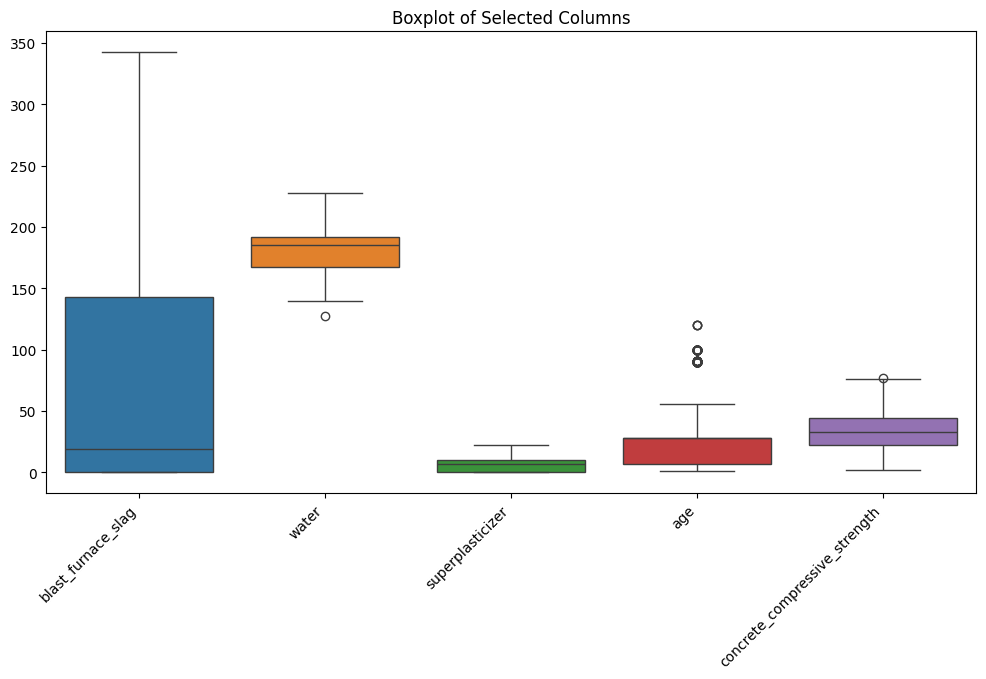

In [48]:
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['blast_furnace_slag', 'water', 'superplasticizer', 'age', 'concrete_compressive_strength']])
plt.title('Boxplot of Selected Columns')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


Outliers are still not fixed for few colomns but while scaling the data they would be fixed

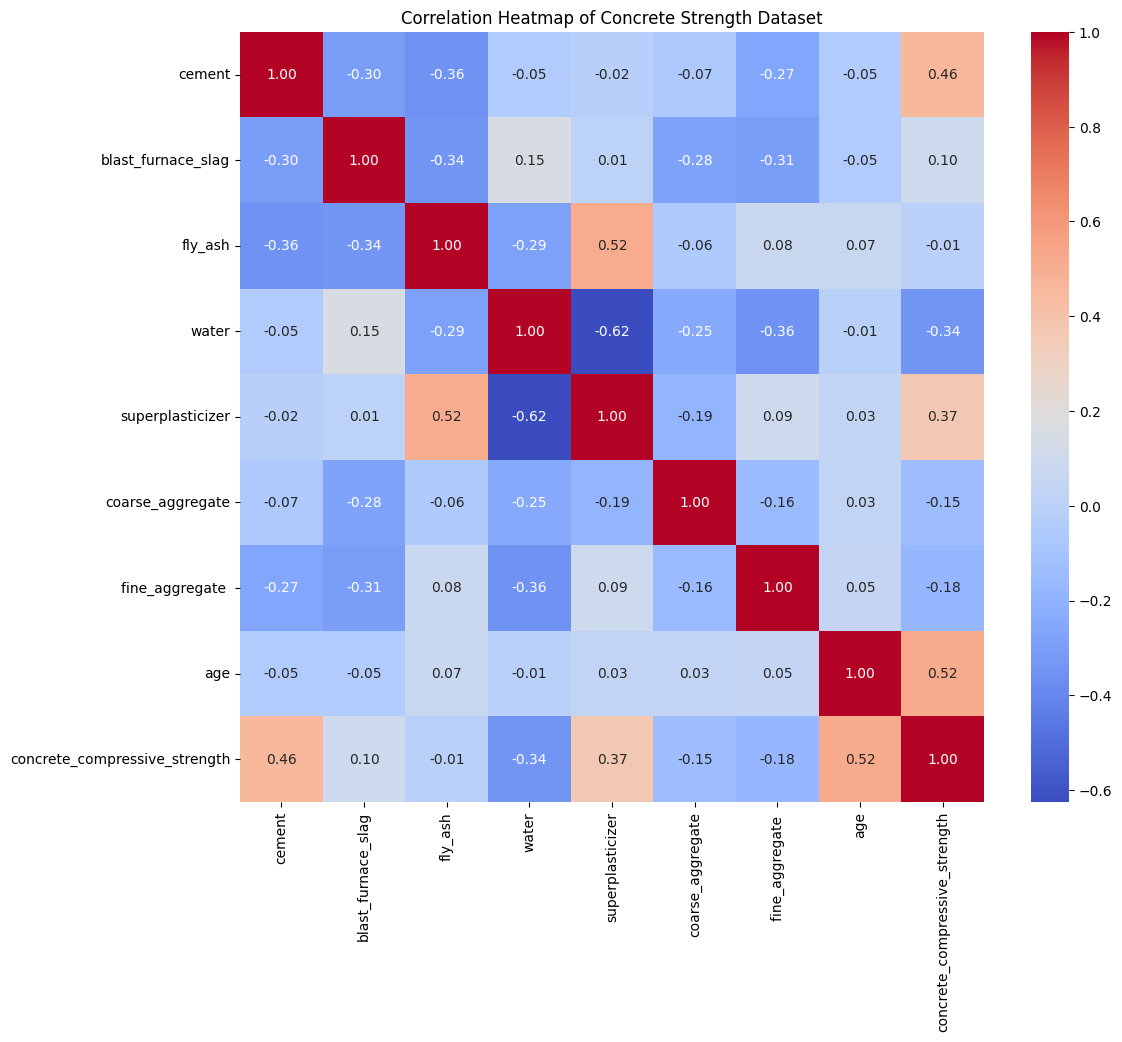

In [49]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Concrete Strength Dataset')
plt.show()


1. Age (0.52) has the highest positive correlation with concrete strength, suggesting it plays a significant role in improving strength.
2. Superplasticizer (0.37) and cement (0.46) also positively impact concrete strength.
3. Water (-0.34) has a negative correlation, indicating that higher water content may reduce strength.
4. Other ingredients like Fly Ash (-0.01) and Fine Aggregate (-0.18) and blast furnance slag(0.10) show weaker correlations.

In [50]:
# printing the data values in an array
data.values


array([[540.  ,   0.  ,   0.  , ..., 676.  ,  28.  ,  61.89],
       [266.  , 114.  ,   0.  , ..., 670.  ,  90.  ,  47.03],
       [380.  ,  95.  ,   0.  , ..., 594.  ,  28.  ,  36.45],
       ...,
       [148.5 , 139.4 , 108.6 , ..., 780.  ,  28.  ,  23.7 ],
       [159.1 , 186.7 ,   0.  , ..., 788.9 ,  28.  ,  32.77],
       [260.9 , 100.5 ,  78.3 , ..., 761.5 ,  28.  ,  32.4 ]])

In [51]:
#Scaling the data
array = data.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[1.   0.   0.   0.34 0.11 0.74 0.23 0.23 0.8 ]
 [0.37 0.33 0.   1.   0.   0.38 0.22 0.75 0.6 ]
 [0.63 0.28 0.   1.   0.   0.38 0.   0.23 0.46]
 [0.37 0.33 0.   1.   0.   0.38 0.22 0.23 0.58]
 [0.85 0.   0.   1.   0.   0.38 0.   0.23 0.5 ]]


In [52]:
# Standardize data (0 mean, 1 stdev)
array = data.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[ 2.64 -0.83 -0.93 -1.04 -0.67  1.01 -1.32 -0.15  1.76]
 [-0.06  0.49 -0.93  2.51 -1.15 -0.57 -1.4   2.04  0.82]
 [ 1.06  0.27 -0.93  2.51 -1.15 -0.57 -2.41 -0.15  0.15]
 [-0.06  0.49 -0.93  2.51 -1.15 -0.57 -1.4  -0.15  0.75]
 [ 2.   -0.83 -0.93  2.51 -1.15 -0.57 -2.41 -0.15  0.33]]


So to conclude factors affecting **concrete_compressive_strength** the most are **age** with corr of 0.52 and **cement** with 0.46 ,**Superplasticizer**  with corr 0.37,
\
These 3 components mostly impact the concrete strength

In [53]:
#Importing neccesary libararies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
# Select the highly correlated features
X = data[['age', 'cement', 'superplasticizer']]
y = data['concrete_compressive_strength']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"rooted Mean Squared Error: {np.sqrt(mse)}")


Mean Squared Error: 91.82142842107584
R-squared: 0.6480011028880843
rooted Mean Squared Error: 9.582349838169959


1. MSE measures the average squared difference between actual and predicted concrete_compressive_strength.
2. RMSE = 9.58 → On average, our predictions are off by ~9.58 units.
3. R² score = 0.648 → Since R² < 0.8, the model fit is moderate, explaining 64.8% of the variance in the target variable. There is room for improvement.
4. MSE = 91.82 → Represents the average squared error, but RMSE is more interpretable.

In [55]:
# Prepare the data for linear regression
X = data.drop('concrete_compressive_strength', axis=1)
y = data['concrete_compressive_strength']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"rooted Mean Squared Error: {np.sqrt(mse)}")


Mean Squared Error: 48.000486995111096
R-squared: 0.8159893744450203
rooted Mean Squared Error: 6.928238376031175


1. RMSE = 6.93 → On average, our predictions are off by ~6.93 units.
2. R² score = 0.816 → Since R² > 0.8, the model is a good fit, explaining 81.6% of the variance in the target variable.
3. MSE = 48.00 → The average squared error between actual and predicted values, though RMSE is more interpretable.

In [59]:
# Input values for prediction
cement = 140 #@param {type:"number"}
blast_furnace_slag = 0 #@param {type:"number"}
fly_ash = 0 #@param {type:"number"}
water = 190 #@param {type:"number"}
superplasticizer = 3 #@param {type:"number"}
coarse_aggregate = 980 #@param {type:"number"}
fine_aggregate = 740 #@param {type:"number"}
age = 30 #@param {type:"number"}

# Create a DataFrame for the input values, ensuring all columns match training data
# The column order should be same as the training data (X_train)
input_data = pd.DataFrame([[cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age]],
                          columns=X.columns) # Use X.columns to get the correct column names

# Use the trained model to predict the profit
y_pred = model.predict(input_data)
print(f"Predicted Concrete Compressive Strength: {y_pred[0]}")

Predicted Concrete Compressive Strength: 9.95383074704992


cement:140
\
blast_furnace_slag:0
\
fly_ash:0
\
water:190
\
superplasticizer:3
\
coarse_aggregate:980
\
fine_aggregate:740
\
age:30
\
for these input values Predicted Concrete Compressive Strength is 9.953
\
since our rmse is ~6.93 which predictions might be off by ~6.93 the actual Concrete Compressive Strength might be 3.023
